In [1]:
import numpy as np
from keras.src.saving.saving_api import load_model
from keras.src.utils.image_utils import img_to_array
from sklearn.model_selection import train_test_split
from keras.src.utils.numerical_utils import to_categorical
from PIL import Image
import tensorflow as tf
import os

import matplotlib.pyplot as plt

In [2]:
#dictionary to label all traffic signs class.
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',      
            2:'Speed limit (50km/h)',       
            3:'Speed limit (60km/h)',      
            4:'Speed limit (70km/h)',    
            5:'Speed limit (80km/h)',      
            6:'End of speed limit (80km/h)',     
            7:'Speed limit (100km/h)',    
            8:'Speed limit (120km/h)',     
           9:'No passing',   
           10:'No passing veh over 3.5 tons',     
           11:'Right-of-way at intersection',     
           12:'Priority road',    
           13:'Yield',     
           14:'Stop',       
           15:'No vehicles',       
           16:'Veh > 3.5 tons prohibited',       
           17:'No entry',       
           18:'General caution',     
           19:'Dangerous curve left',      
           20:'Dangerous curve right',   
           21:'Double curve',      
           22:'Bumpy road',     
           23:'Slippery road',       
           24:'Road narrows on the right',  
           25:'Road work',    
           26:'Traffic signals',      
           27:'Pedestrians',     
           28:'Children crossing',     
           29:'Bicycles crossing',       
           30:'Beware of ice/snow',
           31:'Wild animals crossing',      
           32:'End speed + passing limits',      
           33:'Turn right ahead',     
           34:'Turn left ahead',       
           35:'Ahead only',      
           36:'Go straight or right',      
           37:'Go straight or left',      
           38:'Keep right',     
           39:'Keep left',      
           40:'Roundabout mandatory',     
           41:'End of no passing',      
           42:'End no passing veh > 3.5 tons' }

In [3]:
def load_image(image_path):
    image = Image.open(image_path)
    image = image.resize((30, 30))
    image = image.convert('RGB')
    image = np.expand_dims(image, axis=0)
    image = image.astype(np.float32)
    return image

In [4]:
def load_data_from_csv(csv_file):
    data = []
    labels = []
    with open(csv_file, 'r') as file:
        lines = file.readlines()[1:]  # Bỏ qua dòng tiêu đề
        for line in lines:
            parts = line.strip().split(',')
            image_path = parts[-1]
            try:
                image = load_image(image_path)  # Sử dụng hàm load_image() thay vì mở và xử lý ảnh trực tiếp
                data.append(image)
                labels.append(int(parts[-2]))  # ClassId là phần thứ 7 từ cuối dòng
            except Exception as e:
                print(f"Error loading image: {e}")
    return np.array(data), np.array(labels)

In [5]:
# Load mô hình đã được lưu
model = load_model("my_model.h5")
adv_model = load_model("adversarial_model.h5")

d:\Setting_code\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Load dữ liệu thử nghiệm
X_test, y_test = load_data_from_csv("test.csv")

In [7]:
X_train, y_train = load_data_from_csv("Train.csv")

In [8]:
def fgsm_attack(model, image, label, epsilon):
    image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)  # Remove extra dimension
    label_tensor = tf.convert_to_tensor([label], dtype=tf.int64)
    
    with tf.GradientTape() as tape:
        tape.watch(image_tensor)
        prediction = model(image_tensor)
        loss = tf.keras.losses.sparse_categorical_crossentropy(label_tensor, prediction)
    
    gradient = tape.gradient(loss, image_tensor)
    signed_grad = tf.sign(gradient)
    perturbed_image = image_tensor + epsilon * signed_grad
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 255)
    
    return perturbed_image.numpy()[0]



In [ ]:
def evaluate_model(model, X_test, y_test):
    correct_predictions = 0
    for i in range(len(X_test)):
        prediction = model.predict(X_test[i])
        predicted_label = np.argmax(prediction, axis=1)[0]
        true_label = y_test[i]
        if predicted_label == true_label:
            correct_predictions += 1
    accuracy = correct_predictions / len(X_test)
    return accuracy
evaluate_model(model, X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

0.9338083927157561

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


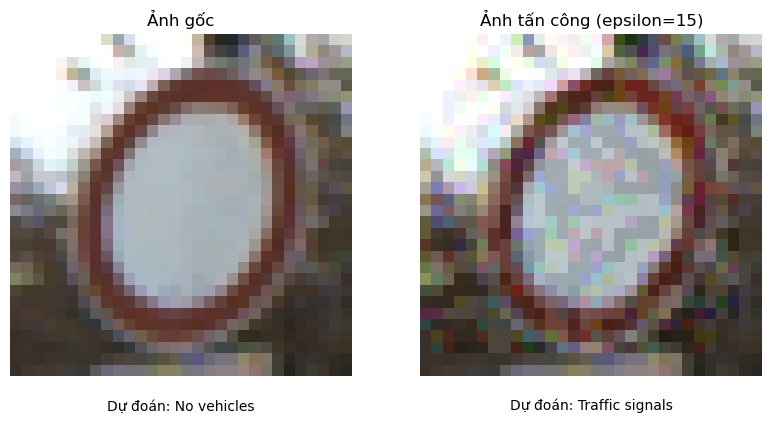

In [11]:
# Mức độ nhiễu
rand_index = 5320
epsilon = 15
image = X_test[rand_index]
label = y_test[rand_index]
perturbed_image = fgsm_attack(model, image, label, epsilon)
# Dự đoán nhãn của ảnh tấn công
perturbed_pr = model.predict(perturbed_image.reshape(1, 30, 30, 3))
perturbed_label = np.argmax(perturbed_pr)

# Hiển thị ảnh gốc và ảnh tấn công
plt.figure(figsize=(15, 5))

# Ảnh gốc
plt.subplot(1, 3, 1)
plt.imshow(image.squeeze().astype(int))  # Squeeze để loại bỏ chiều thêm
plt.title('Ảnh gốc')
plt.text(0.5, -0.1, 'Dự đoán: {}'.format(classes[label]), ha='center', transform=plt.gca().transAxes)  # Thêm dự đoán của ảnh gốc
plt.axis('off')

# Ảnh tấn công
plt.subplot(1, 3, 2)
plt.imshow(perturbed_image.astype(int))
plt.title('Ảnh tấn công (epsilon={})'.format(epsilon))
plt.text(0.5, -0.1, 'Dự đoán: {}'.format(classes[perturbed_label]), ha='center', transform=plt.gca().transAxes)  # Thêm dự đoán của ảnh tấn công
plt.axis('off')

plt.show()

In [12]:
# Dự đoán nhãn của ảnh gốc và ảnh tấn công
pr = model.predict(perturbed_image.reshape(1, 30, 30, 3))
confidence = np.max(pr)  # Độ tự tin của mô hình là xác suất cao nhất trong vector dự đoán
predicted_label = np.argmax(pr)
predicted_label_name = classes[predicted_label]

# Hiển thị độ tự tin và nhãn dự đoán
print("Độ tự tin của mô hình khi dự đoán ảnh nhiễu là:", confidence)
print("Nhãn dự đoán của ảnh nhiễu là:", predicted_label_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Độ tự tin của mô hình khi dự đoán ảnh nhiễu là: 0.38933516
Nhãn dự đoán của ảnh nhiễu là: Traffic signals


In [13]:
# Dự đoán nhãn của ảnh gốc và ảnh tấn công
pr = model.predict(image.reshape(1, 30, 30, 3))
confidence = np.max(pr)  # Độ tự tin của mô hình là xác suất cao nhất trong vector dự đoán
predicted_label = np.argmax(pr)
predicted_label_name = classes[predicted_label]

# Hiển thị độ tự tin và nhãn dự đoán
print("Độ tự tin của mô hình khi dự đoán ảnh gốc là:", confidence)
print("Nhãn dự đoán của ảnh gốc là:", predicted_label_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Độ tự tin của mô hình khi dự đoán ảnh gốc là: 0.99998975
Nhãn dự đoán của ảnh gốc là: No vehicles


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


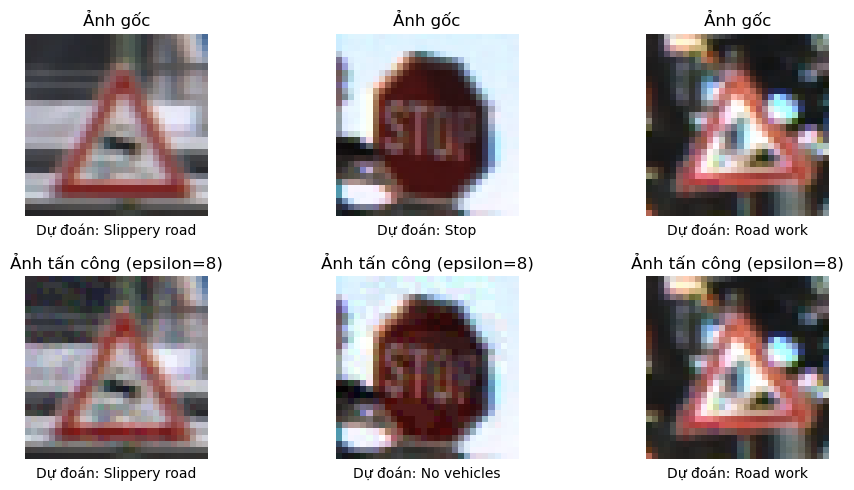

In [18]:
def plot_attack_examples(model, X_test, y_test, epsilon, num_examples=3):
    plt.figure(figsize=(10, 5))
    
    for i in range(num_examples):
        # Lấy một chỉ số ngẫu nhiên từ tập dữ liệu
        rand_index = np.random.randint(0, len(X_test))
        
        # Lấy ảnh và nhãn gốc
        image = X_test[rand_index]
        label = y_test[rand_index]
        
        # Tạo ảnh tấn công
        perturbed_image = fgsm_attack(model, image, label, epsilon)
        
        # Dự đoán nhãn của ảnh gốc và ảnh tấn công
        original_pr = model.predict(image.reshape(1, 30, 30, 3))
        original_label = np.argmax(original_pr)
        
        perturbed_pr = model.predict(perturbed_image.reshape(1, 30, 30, 3))
        perturbed_label = np.argmax(perturbed_pr)
        
        # Hiển thị ảnh gốc
        plt.subplot(2, num_examples, i + 1)
        plt.imshow(image.squeeze().astype(int))
        plt.title('Ảnh gốc')
        plt.text(0.5, -0.1, 'Dự đoán: {}'.format(classes[original_label]), ha='center', transform=plt.gca().transAxes)
        plt.axis('off')
        
        # Hiển thị ảnh tấn công
        plt.subplot(2, num_examples, num_examples + i + 1)
        plt.imshow(perturbed_image.astype(int))
        plt.title('Ảnh tấn công (epsilon={})'.format(epsilon))
        plt.text(0.5, -0.1, 'Dự đoán: {}'.format(classes[perturbed_label]), ha='center', transform=plt.gca().transAxes)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Gọi hàm để hiển thị ảnh trước và sau khi bị tấn công
plot_attack_examples(model, X_test, y_test, epsilon=8)

In [ ]:
def plot_attack_examples(model, X_train, y_train, epsilon, num_examples=3):
    plt.figure(figsize=(10, 5))
    
    for i in range(num_examples):
        # Lấy một chỉ số ngẫu nhiên từ tập dữ liệu
        rand_index = np.random.randint(0, len(X_test))
        
        # Lấy ảnh và nhãn gốc
        image = X_train[rand_index]
        label = y_train[rand_index]
        
        # Tạo ảnh tấn công
        perturbed_image = fgsm_attack(model, image, label, epsilon)
        
        # Dự đoán nhãn của ảnh gốc và ảnh tấn công
        original_pr = model.predict(image.reshape(1, 30, 30, 3))
        original_label = np.argmax(original_pr)
        
        perturbed_pr = model.predict(perturbed_image.reshape(1, 30, 30, 3))
        perturbed_label = np.argmax(perturbed_pr)
        
        # Hiển thị ảnh gốc
        plt.subplot(2, num_examples, i + 1)
        plt.imshow(image.squeeze().astype(int))
        plt.title('Ảnh gốc')
        plt.text(0.5, -0.1, 'Dự đoán: {}'.format(classes[original_label]), ha='center', transform=plt.gca().transAxes)
        plt.axis('off')
        
        # Hiển thị ảnh tấn công
        plt.subplot(2, num_examples, num_examples + i + 1)
        plt.imshow(perturbed_image.astype(int))
        plt.title('Ảnh tấn công (epsilon={})'.format(epsilon))
        plt.text(0.5, -0.1, 'Dự đoán: {}'.format(classes[perturbed_label]), ha='center', transform=plt.gca().transAxes)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Gọi hàm để hiển thị ảnh trước và sau khi bị tấn công
plot_attack_examples(model, X_test, y_test, epsilon=8)

In [379]:
def evaluate_single_sample(model, image, label):
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction, axis=1)[0] 
    return predicted_label == y_test  # So sánh nhãn dự đoán với nhãn thực sự

In [446]:
def evaluate_single_sample(model, image, label):
    prediction = model.predict(image)  # Không cần expand_dims nữa vì bạn đã reshape trước khi gọi hàm này
    predicted_label = np.argmax(prediction, axis=1)[0]  # Lấy nhãn dự đoán có xác suất cao nhất
    return predicted_label == label  # So sánh nhãn dự đoán với nhãn thực sự

epsilons = []
for i in range(1000):  # Giới hạn số mẫu để kiểm tra
    for epsilon in range(1, 50):  # Thử nghiệm các giá trị epsilon từ 1 đến 50
        perturbed_image = fgsm_attack(model, X_test[i], y_test[i], epsilon)  # Tạo ảnh bị tấn công với epsilon hiện tại
        perturbed_image = perturbed_image.reshape(1, 30, 30, 3)  # Đảm bảo reshape trước khi đưa vào model
        if not evaluate_single_sample(model, perturbed_image, y_test[i]):  # Kiểm tra nếu nhãn dự đoán thay đổi
            epsilons.append(epsilon)  # Nếu thay đổi, thêm epsilon vào danh sách
            print(f"Epsilon for X_test[{i}] is {epsilon}")  # In ra epsilon đã tìm được
            break  # Dừng vòng lặp nếu đã tìm được epsilon thay đổi nhãn

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

In [449]:
# Giá trị epsilon tối ưu để model nhận diện sai
np.mean(epsilons)

10.773006134969325

In [540]:
def evaluate_model_under_attack(model, X_test, y_test, epsilon):
    correct_predictions = 0
    for i in range(len(X_test)):
        # Tạo ảnh bị tấn công với epsilon cho mỗi mẫu trong X_test
        perturbed_image = fgsm_attack(model, X_test[i], y_test[i], epsilon)
        # Dự đoán nhãn cho ảnh bị tấn công
        perturbed_pr = model.predict(perturbed_image.reshape(1, 30, 30, 3))
        perturbed_label = np.argmax(perturbed_pr)
        true_label = y_test[i]
        if perturbed_label == true_label:
            correct_predictions += 1
    accuracy = correct_predictions / len(X_test)
    return accuracy

# Tính chỉ số độ chính xác sau khi mô hình bị tấn công với giá trị epsilon là 11
epsilon = 11
accuracy_under_attack = evaluate_model_under_attack(model, X_test, y_test, epsilon)
print("Accuracy under attack with epsilon 11:", accuracy_under_attack)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

In [541]:
accuracy_under_attack

0.5794932699920824

In [9]:
from keras.preprocessing.image import save_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


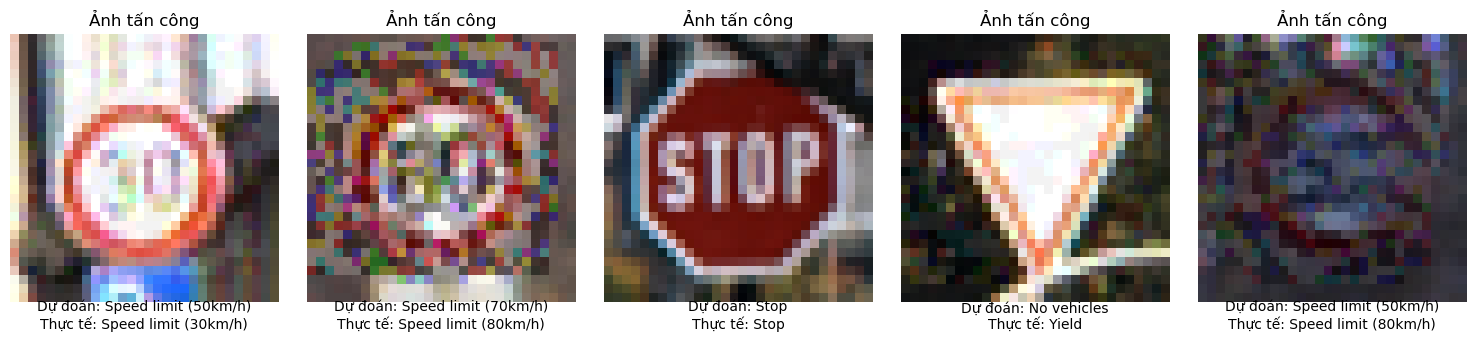

In [49]:
# import numpy as np
# import matplotlib.pyplot as plt
# import random

# def plot_random_examples(model, X_per, y_per, num_examples=5, classes=None):
#     plt.figure(figsize=(15, 7))
    
#     indices = random.sample(range(len(X_per)), num_examples)
    
#     for i, idx in enumerate(indices):
#         image = X_per[idx]
#         true_label = int(y_per[idx])
        
#         # Dự đoán nhãn của ảnh tấn công
#         pred_prob = model.predict(image.reshape(1, *image.shape))
#         pred_label = np.argmax(pred_prob)
        
#         # Hiển thị ảnh
#         plt.subplot(2, num_examples, i + 1)
#         plt.imshow(image.astype(int))
#         plt.title('Ảnh tấn công')
#         if classes:
#             plt.text(0.5, -0.1, f'Dự đoán: {classes[pred_label]}\nThực tế: {classes[true_label]}', 
#                      ha='center', transform=plt.gca().transAxes)
#         else:
#             plt.text(0.5, -0.1, f'Dự đoán: {pred_label}\nThực tế: {true_label}', 
#                      ha='center', transform=plt.gca().transAxes)
#         plt.axis('off')
    
#     plt.tight_layout()
#     plt.show()

# # Giả sử model, X_per, y_per đã được định nghĩa và nạp từ trước
# # Giả sử classes là danh sách các tên lớp tương ứng với nhãn, nếu không có thể bỏ qua tham số này
# plot_random_examples(model, X_per, y_per, classes=classes)

In [148]:
def create_and_save_perturbed_images(model, X_train, y_train, epsilon, num_images=39209, save_dir='fgsm_train'):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    for i in range(num_images):
        # Lấy ảnh và nhãn gốc
        image = X_train[i]
        label = y_train[i]
        
        # Tạo ảnh tấn công
        perturbed_image = fgsm_attack(model, image, label, epsilon)
        
        # Tạo đường dẫn để lưu ảnh
        file_path = os.path.join(save_dir, 'perturbed_image_{}.png'.format(i))
        
        # Lưu ảnh bị tấn công
        save_img(file_path, perturbed_image)
    
    print(f"Đã lưu {num_images} ảnh tấn công vào thư mục '{save_dir}'")

# Giả sử model, X_train, y_train đã được định nghĩa và nạp từ trước
epsilon = 8
create_and_save_perturbed_images(model, X_train, y_train, epsilon)

Đã lưu 39209 ảnh tấn công vào thư mục 'fgsm_train'


In [10]:
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array

def load_perturbed_images(save_dir='fgsm_train', num_images=39209, img_shape=(30, 30, 3)):
    X_per = np.zeros((num_images, *img_shape))
    y_per = np.zeros((num_images,))  # Giả sử y_per chỉ chứa nhãn gốc từ y_train

    for i in range(num_images):
        # Tạo đường dẫn để tải ảnh
        file_path = os.path.join(save_dir, 'perturbed_image_{}.png'.format(i))
        
        # Tải ảnh và chuyển đổi thành mảng numpy
        image = load_img(file_path, target_size=img_shape[:2])
        image_array = img_to_array(image)
        
        # Lưu ảnh vào X_per
        X_per[i] = image_array
        
        # Lưu nhãn tương ứng vào y_per (giả sử nhãn gốc từ y_train)
        y_per[i] = y_train[i]
    
    return X_per, y_per

# Giả sử y_train đã được định nghĩa và nạp từ trước
X_per, y_per = load_perturbed_images()


In [152]:
import numpy as np
from sklearn.metrics import accuracy_score

# Giả sử model đã được định nghĩa và nạp từ trước
# Dự đoán nhãn cho tập ảnh X_per
y_pred = model.predict(X_per)

# Tính nhãn dự đoán từ các xác suất
y_pred_classes = np.argmax(y_pred, axis=1)

# Tính độ chính xác trên tập dữ liệu tấn công
accuracy = accuracy_score(y_per, y_pred_classes)
print(f"Accuracy on test data: {accuracy}")

# Tính độ tự tin cao nhất cho mỗi ảnh
confidence_scores = np.max(y_pred, axis=1)

# Tính trung bình độ tự tin
average_confidence = np.mean(confidence_scores)
print(f"Average confidence on adversarial images: {average_confidence:.4f}")

1226/1226 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Accuracy on test data: 0.6574510954117677
Average confidence on adversarial images: 0.9164


In [153]:
def combine_datasets(X_train, X_per, y_train):
    X_combined = np.concatenate([X_train, X_per])
    y_combined = np.concatenate([y_train, y_train])
    return X_combined, y_combined

In [164]:
X_train = X_train.squeeze()

In [154]:
import numpy as np
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping

In [156]:
def adversarial_training(model, X_train, y_train, batch_size=32, epochs=10):
    
    # Kết hợp dữ liệu gốc và dữ liệu nhiễu
    X_combined, y_combined = combine_datasets(X_train, X_per, y_train)
    
    # Compile model
    model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
    
    # Huấn luyện mô hình
    early_stopping = EarlyStopping(monitor='loss', patience=3)
    model.fit(X_combined, y_combined, batch_size=batch_size, epochs=epochs, callbacks=[early_stopping])
    
    return model

In [165]:
batch_size = 32
epochs = 10

# Thực hiện adversarial training
model = adversarial_training(model, X_train, y_train, batch_size, epochs)

Epoch 1/10
2451/2451 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.8217 - loss: 0.8426
Epoch 2/10
2451/2451 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.8607 - loss: 0.5228
Epoch 3/10
2451/2451 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.8675 - loss: 0.4957
Epoch 4/10
2451/2451 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8666 - loss: 0.5092
Epoch 5/10
2451/2451 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8798 - loss: 0.4610
Epoch 6/10
2451/2451 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8662 - loss: 0.5153
Epoch 7/10
2451/2451 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8781 - loss: 0.4778
Epoch 8/10
2451/2451 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8866 - loss: 0.4397
Epoch 9/10
2451/2451 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8771 - loss: 0.4860
Epoch 10/10
2451/2451 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8788 - loss: 0.4861


In [166]:
model.save('adversarial_model.h5')

In [167]:
y_pred = model.predict(X_per)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_per, y_pred_classes)
print(f"Accuracy on test data: {accuracy}")

confidence_scores = np.max(y_pred, axis=1)
average_confidence = np.mean(confidence_scores)
print(f"Average confidence on adversarial images: {average_confidence:.4f}")

1226/1226 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
Accuracy on test data: 0.8918615623963886
Average confidence on adversarial images: 0.8811
